In [1]:
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

from scipy.fft import fft, fftfreq

# tutorial taken from here:
# https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

In [2]:
paths = [
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138', '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138'
]
stream_b00 = obspy.read(paths[0])
for p in paths[1:]:
    stream_b00 = stream_b00 + obspy.read(p)

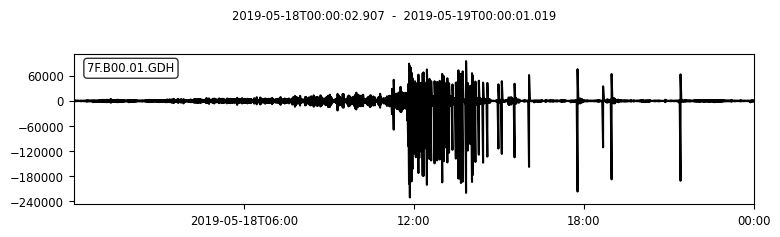

In [28]:
ax = stream_b00[0].plot()

In [3]:
fft_hydrophone0 = fft(stream_b00[0].data)

In [18]:
N = fft_hydrophone0.shape[0]

In [19]:
xf = fftfreq(N, 1/1000.)

In [16]:
xf

array([  0.00000000e+00,   1.15743269e-05,   2.31486537e-05, ...,
        -3.47229806e-05,  -2.31486537e-05,  -1.15743269e-05])

In [12]:
np.abs(fft_hydrophone0)

array([  3.49486667e+10,   7.10401598e+08,   6.15215540e+08, ...,
         1.42863772e+08,   6.15215540e+08,   7.10401598e+08])

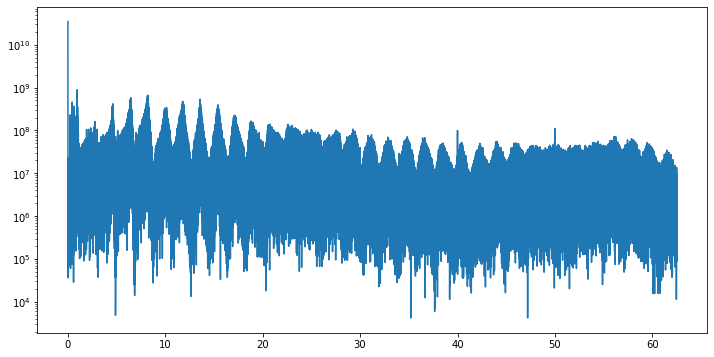

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(xf[:N//16], np.abs(fft_hydrophone0)[0:N//16])
# ax.set_xscale('log')
ax.set_yscale('log')

In [25]:
len(fft_hydrophone0[:N//16])

5399882